# Python Data Visualization With Matplotlib and Seaborn
## Types of Graphs and Visualizatoin Tools
| **Category**                         | **Chart Type**                        |
|-------------------------------------|--------------------------------------|
| **Bar Graphs**                      | - Vertical Bar Graph                 |
|                                     | - Horizontal Bar Graph               |
|                                     | - Grouped Bar Graph                  |
|                                     | - Stacked Bar Graph                  |
| **Line Graphs**                     | - Simple Line Graph                  |
|                                     | - Multiple Line Graph                |
| **Area and Surface Charts**         | - Area Chart                         |
|                                     | - Stacked Area Chart                 |
|                                     | - Surface Plot                       |
| **Heat Maps and Density Plots**     | - Heat Map                           |
|                                     | - Density Plot                       |
| **Pie and Circular Charts**         | - Pie Chart                          |
|                                     | - Doughnut Chart                     |
| **Statistical Charts**              | - Box Plot (Box-and-Whisker Plot)    |
|                                     | - Violin Plot                        |
|                                     | - Stem-and-Leaf Plot                 |
| **Time-Series Analysis**            | - Time Series Chart                  |
|                                     | - Seasonal Decomposition Chart       |
| **Special Line Graphs**             | - Multiple Line Graph                |
|                                     | - Exponential Graphs                 |
|                                     | - Logarithmic Graphs                 |
|                                     | - Trigonometric Graphs               |
| **Scatter and Plot Charts**         | - Scatter Plot                       |
|                                     | - Bubble Chart                       |
| **Distribution Charts**             | - Histogram                          |
|                                     | - Frequency Distribution Graph       |
|                                     | - Frequency Polygon                  |
|                                     | - Cumulative Frequency Distribution Graph |
| **Other Visual Representation Tools**| - Radar Chart (Spider Chart)         |
|                                     | - Funnel Chart                       |
|                                     | - Gantt Chart                        |



## Chart Types Organized by Data Analysis Goals
| **Category**      | **Chart Type**                                                                                                                                       |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Comparisons**   | - Bar Graph (Vertical, Horizontal, Grouped, Stacked) <br> - Line Graph <br> - Multiple Line Graph <br> - Radar Chart <br> - Gantt Chart               |
| **Relationships** | - Scatter Plot <br> - Bubble Chart <br> - Heat Map <br> - Density Plot <br> - Correlation Matrix                                                     |
| **Distributions** | - Histogram <br> - Box Plot (Box-and-Whisker Plot) <br> - Violin Plot <br> - Frequency Polygon <br> - Stem-and-Leaf Plot <br> - Cumulative Frequency Distribution Graph |
| **Compositions**  | - Pie Chart <br> - Doughnut Chart <br> - Stacked Bar Graph <br> - Stacked Area Chart <br> - Funnel Chart                                            |                                          |


 ## Data Comparison and Visualization
 - Bar Charts
 - Line Graph
 - Multiple Line Graphs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Compare GPD Growth of Nepal, India and China
- Bar Chart
- Line Graph

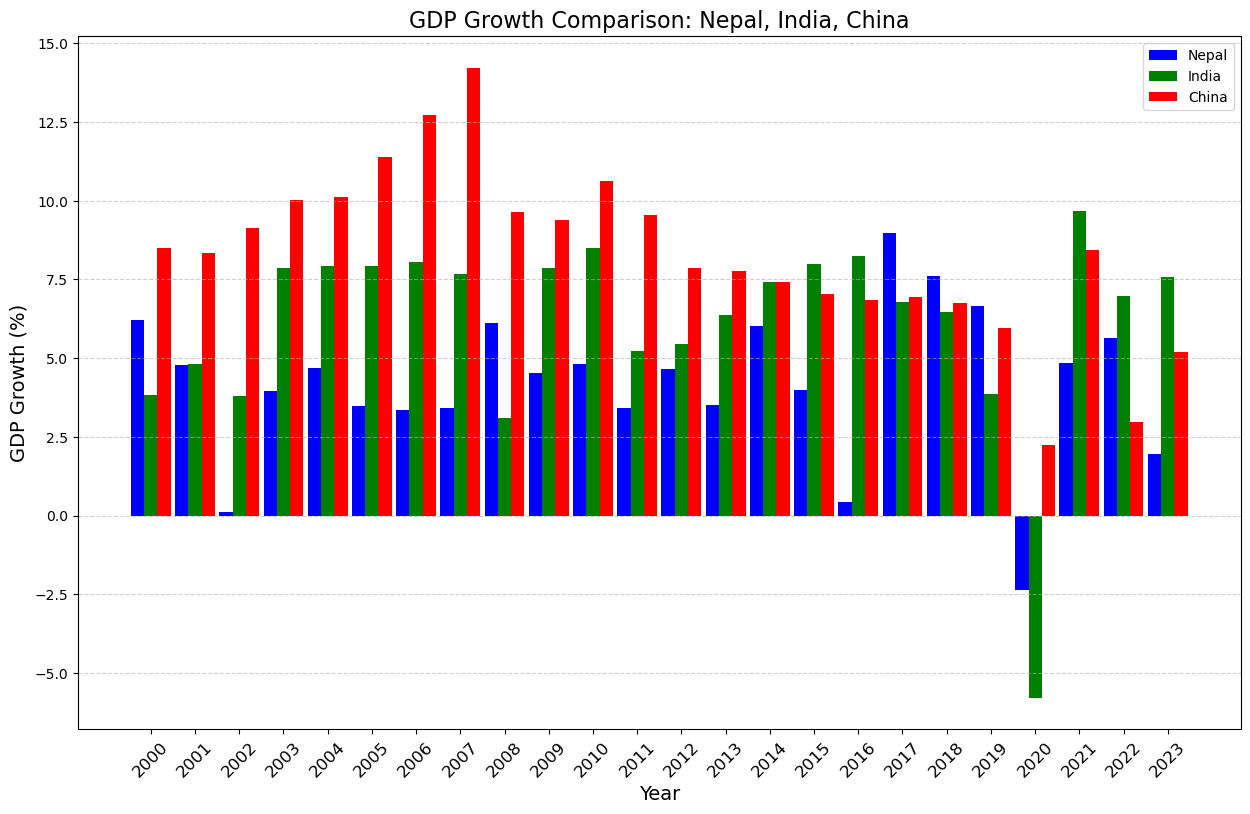

In [3]:
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')


# Set up the figure size
plt.figure(figsize=(15, 9))

# Define the width of the bars 
width = 0.3
x = range(len(nep_ind_china_gdp_data['Year']))

# Plotting the bars for Nepal India and China 
plt.bar([i - width for i in x], nep_ind_china_gdp_data['Nepal'], width=width, label='Nepal', color='blue')
plt.bar([i for i in x], nep_ind_china_gdp_data['India'], width=width, label='India', color='green')
plt.bar([i+width for i in x], nep_ind_china_gdp_data['China'], width=width, label='China', color='red')

# Adding titles and labels
plt.title('GDP Growth Comparison: Nepal, India, China', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP Growth (%)', fontsize=14)
plt.xticks(x, nep_ind_china_gdp_data['Year'], fontsize=12,rotation=45)
plt.legend()
 
# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the chart
plt.show()


### Line Graph

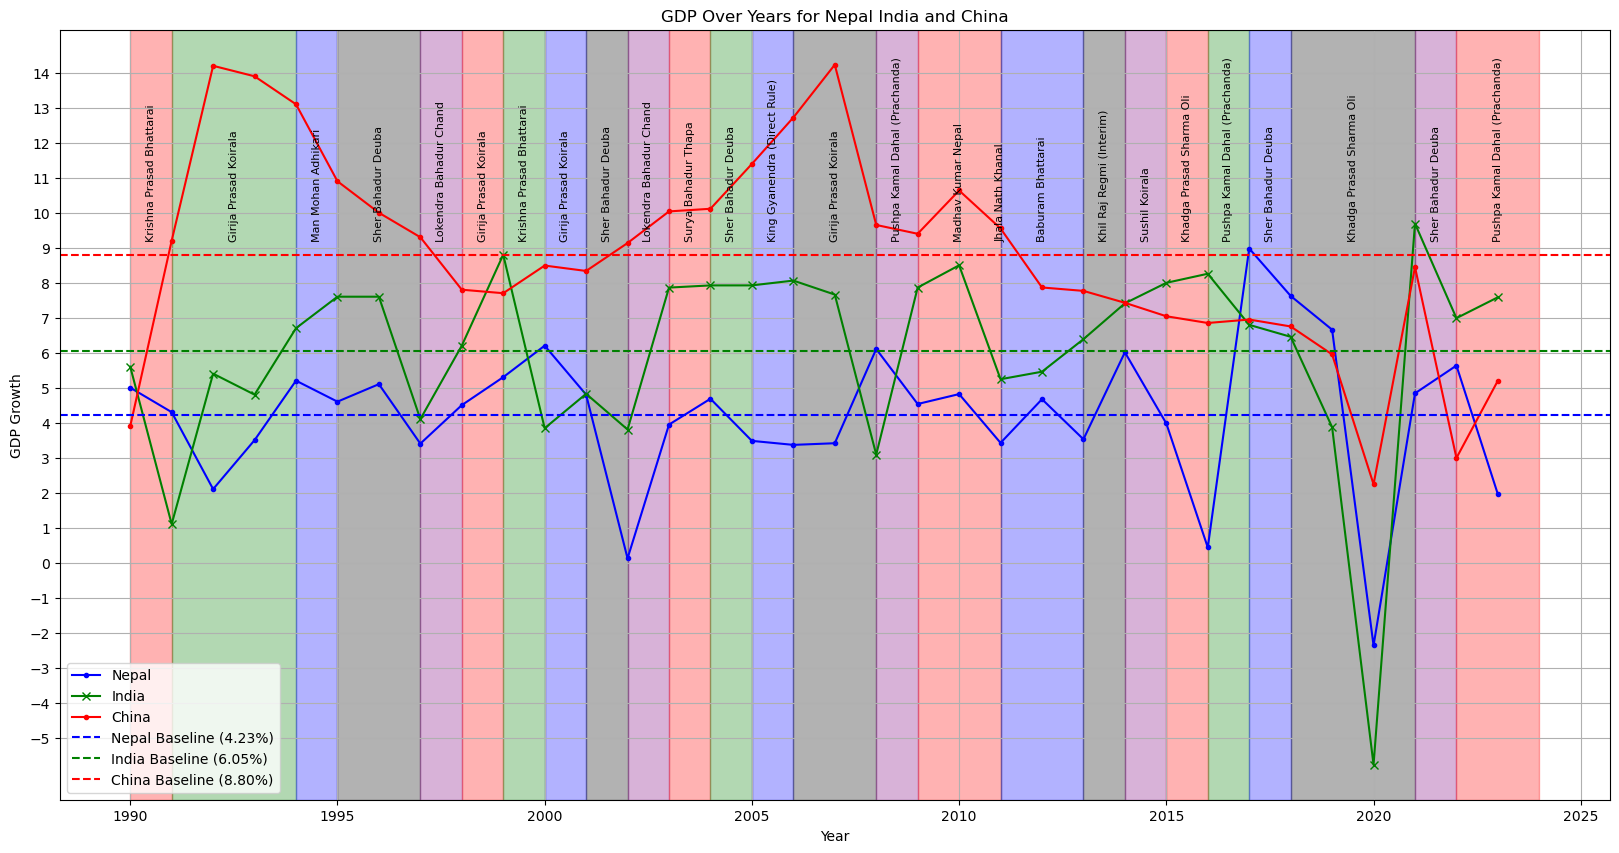

In [25]:
nep_ind_china_gdp_data = pd.read_csv('data/nep-india-china-gdp.csv')
prime_minister_data = pd.read_csv('data/nepal-prime-minister-data.csv')
prime_minister_data['StartDate'] = pd.to_datetime(prime_minister_data['StartDate'])
prime_minister_data['EndDate'] = pd.to_datetime(prime_minister_data['EndDate'])

# Data
years = nep_ind_china_gdp_data['Year']
nepal_gdp = nep_ind_china_gdp_data['Nepal']
india_gdp = nep_ind_china_gdp_data['India']
china_gdp = nep_ind_china_gdp_data['China']

# Calculate the baseline (average GDP growth rate)
nepal_baseline = nepal_gdp.mean()
india_baseline = india_gdp.mean()
china_baseline = china_gdp.mean()

# Create the plot
plt.figure(figsize=(20, 10))
plt.plot(years, nep_ind_china_gdp_data['Nepal'], label='Nepal', color='blue',marker='.')
plt.plot(years, india_gdp, label='India', color='green',marker='x')
plt.plot(years, china_gdp, label='China', color='red',marker='.')

# Add the baseline lines for each country's GDP
plt.axhline(nepal_baseline, color='blue', linestyle='--', label=f'Nepal Baseline ({nepal_baseline:.2f}%)')
plt.axhline(india_baseline, color='green', linestyle='--', label=f'India Baseline ({india_baseline:.2f}%)')
plt.axhline(china_baseline, color='red', linestyle='--', label=f'China Baseline ({china_baseline:.2f}%)')
# Add Prime Minister tenures as shaded regions and text annotations
colors = ['red', 'green', 'blue', 'black', 'purple']
for index, row in prime_minister_data.iterrows():
    # Extract the start and end years
    start_year = row['StartDate'].year
    end_year = row['EndDate'].year
    
    # Add shaded region for the PM's tenure
    plt.axvspan(start_year, end_year, color=colors[index % len(colors)], alpha=0.3)
    
    # Calculate mid-point for placing the label
    mid_year = (start_year + end_year) / 2
    
    # Add the PM's name as a vertical label
    plt.text(mid_year, max(nepal_gdp) + 0.2, row['Name'],
             rotation=90, verticalalignment='bottom', horizontalalignment='center',
             fontsize=8, color='black')
# Labeling the axes and title
plt.xlabel('Year')
plt.ylabel('GDP Growth')
plt.title('GDP Over Years for Nepal India and China')

# Show legend
plt.legend()

# Show the plot
plt.yticks(range(int(min(india_gdp)), int(max(china_gdp)) + 1, 1))  # Y-axis with scale of 1
plt.grid(True)
plt.show()



## Visualize Relationship Between Data
- **Scatter Plot**: A scatter plot identifies a possible relationship between changes observed in two different sets of variables  
- **Bubble Chart**:  A bubble chart can be used to represent the relationship between x (age), y(income), and bubble size (expense)
- **Heat Map**: Heat maps are graphical representations of data that use colors to show the intensity of a variable or a relationship
- **Density Plot**: A Density Plot visualises the distribution of data over a continuous interval or time period
- **Correlation Matrix**: A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set     

### Scattered Plot

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


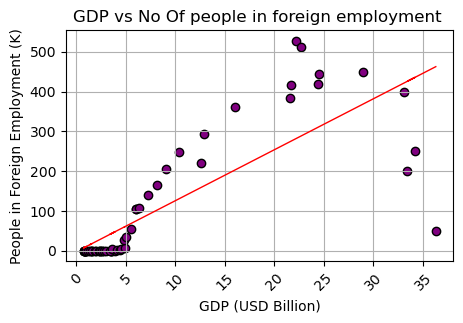

In [5]:
from IPython.display import display
import numpy as np
#  Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment'] = nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n : n/1000)
display(nepal_economy.head())
plt.figure(figsize=(5, 3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor='black'
)

# Fit a linear regression model to the data
x = nepal_economy['GDP']
y = nepal_economy['no_of_people_in_foreign_employment']
m, c = np.polyfit(x, y, 1) # 1 is degree of polynomial y=mx+c is of degree 1

# Plot the trend line
plt.plot(x, m * x + c, color='red', linewidth=1, label='GDP-FE-Trend-Line')


# Add titles and labels
plt.xticks(rotation=45)
plt.title('GDP vs No Of people in foreign employment ')
plt.xlabel('GDP (USD Billion)')
plt.ylabel('People in Foreign Employment (K)')
plt.grid(True)
 
# Display the plot
plt.show()

### Bubble Chart

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


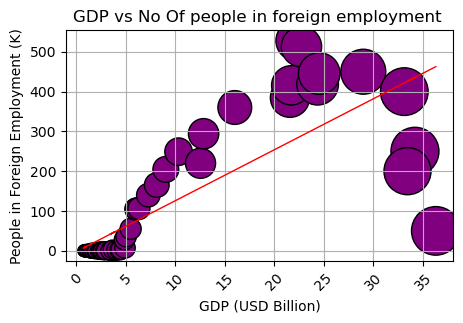

In [6]:
# Classwork
# x = nepal_economy['GDP', 
# y = nepal_economy['no_of_people_in_foreign_employment'] 
# bubble_size = nepal_economy['par_capita'] 
from IPython.display import display
import numpy as np
#  Create the scatter plot
nepal_economy = pd.read_csv('data/nepal-economy.csv')
nepal_economy['no_of_people_in_foreign_employment'] = nepal_economy['no_of_people_in_foreign_employment'].apply(lambda n : n/1000)
display(nepal_economy.head())
plt.figure(figsize=(5, 3))
plt.scatter(
    nepal_economy['GDP'],
    nepal_economy['no_of_people_in_foreign_employment'],
    color='purple',
    edgecolor='black',
    s=nepal_economy['per_capita'] 
)

# Fit a linear regression model to the data
x = nepal_economy['GDP']
y = nepal_economy['no_of_people_in_foreign_employment']
m, c = np.polyfit(x, y, 1) # 1 is degree of polynomial y=mx+c is of degree 1

# Plot the trend line
plt.plot(x, m * x + c, color='red', linewidth=1, label='GDP-FE-Trend-Line')


# Add titles and labels
plt.xticks(rotation=45)
plt.title('GDP vs No Of people in foreign employment ')
plt.xlabel('GDP (USD Billion)')
plt.ylabel('People in Foreign Employment (K)')
plt.grid(True)

# Display the plot
plt.show()

### Heat Map

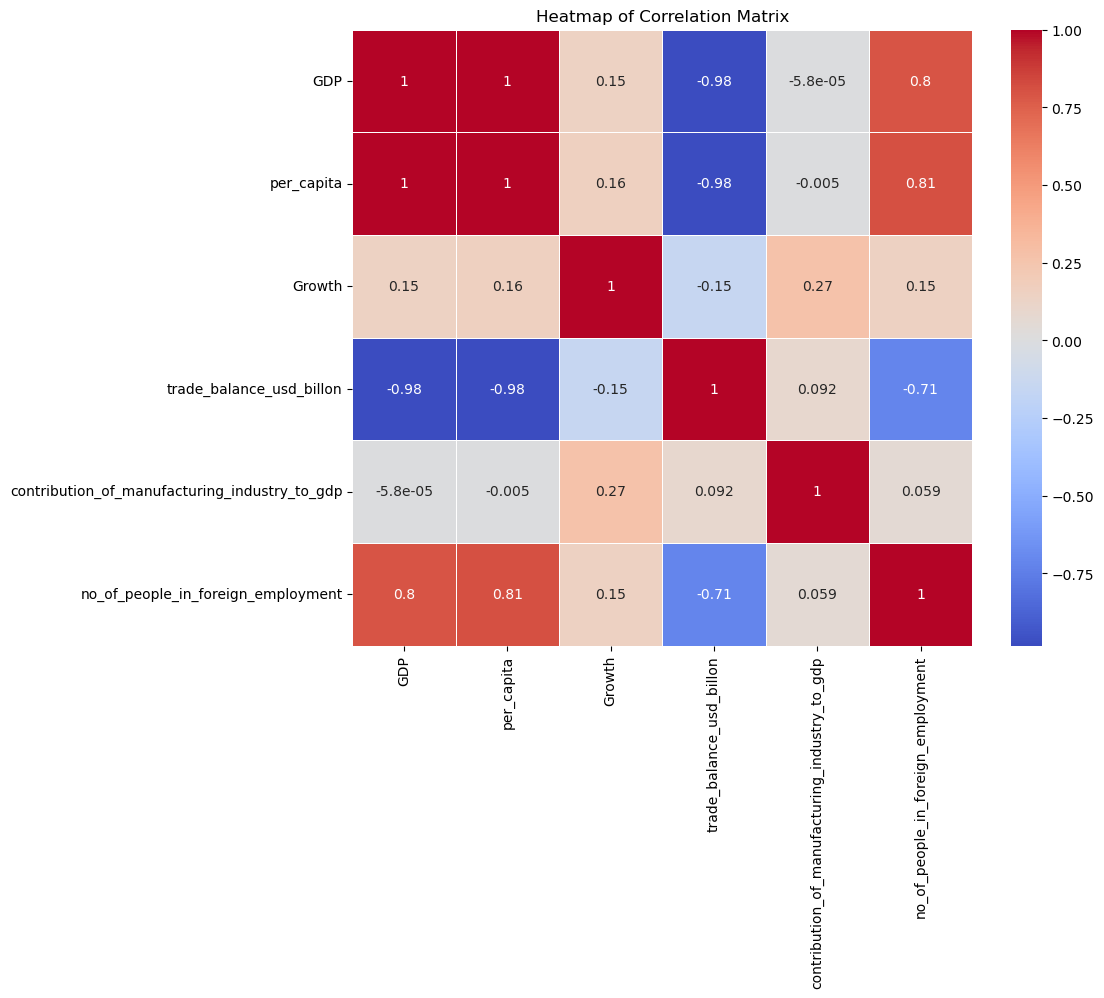

In [7]:
import seaborn as sns
plt.figure(figsize=(10, 8))
correlation_matrix = nepal_economy.drop(columns=['Year'],inplace=False).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


### Density Plot

C:\Users\tekra\AppData\Local\Temp\ipykernel_22988\2492088772.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=nep_p_data, fill=True, common_norm=False, palette='coolwarm')


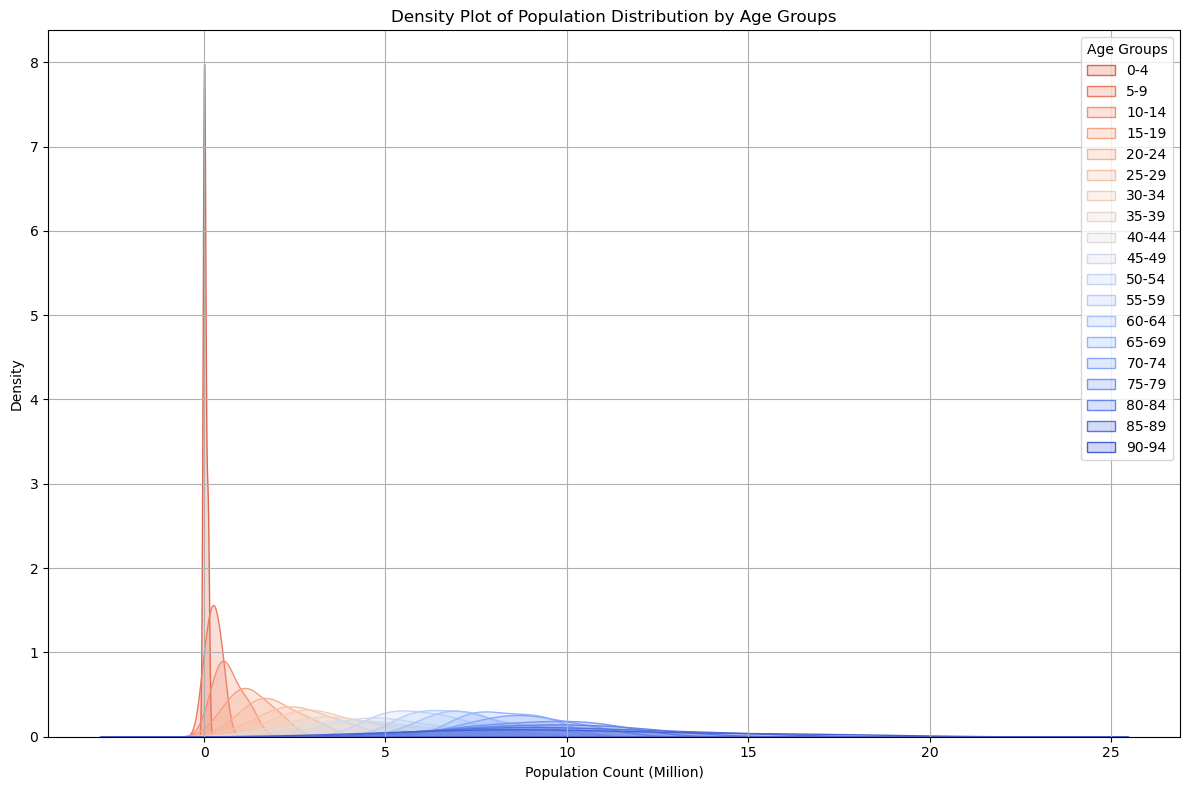

In [8]:
# Set up the figure size
nep_p_data = pd.read_csv('data/nepal-population-distribution.csv')
nep_p_data = nep_p_data.groupby(['Year']).sum(numeric_only=True).reset_index()
nep_p_data.drop(columns=['Year'])
nep_p_data = nep_p_data.drop(columns=['Year'])

plt.figure(figsize=(12, 8))

# Transpose the DataFrame to plot each age group as a separate density curve
sns.kdeplot(data=nep_p_data, fill=True, common_norm=False, palette='coolwarm')

# Add titles and labels
plt.title('Density Plot of Population Distribution by Age Groups')
plt.xlabel('Population Count (Million)')
plt.ylabel('Density')
plt.grid(True)
plt.legend(nep_p_data.columns, title='Age Groups')
plt.tight_layout()

# Display the plot
plt.show()

## Correlation Matrix (as a table)

In [9]:
correlation_matrix = nepal_economy.corr()
correlation_matrix


,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
Year,1.000000,0.845820,0.846708,0.254044,-0.766659,0.475763,0.771020
GDP,0.845820,1.000000,0.998997,0.146186,-0.982487,-0.000058,0.796869
per_capita,0.846708,0.998997,1.000000,0.158333,-0.979142,-0.005014,0.809410
Growth,0.254044,0.146186,0.158333,1.000000,-0.147418,0.265296,0.148406
trade_balance_usd_billon,-0.766659,-0.982487,-0.979142,-0.147418,1.000000,0.091974,-0.712016
contribution_of_manufacturing_industry_to_gdp,0.475763,-0.000058,-0.005014,0.265296,0.091974,1.000000,0.059188
no_of_people_in_foreign_employment,0.771020,0.796869,0.809410,0.148406,-0.712016,0.059188,1.000000


## Distributions
- **Histogram**: Histogram is used to describe numecical data which have grouped into frequency distribution
- **Frequency Polygon**: Frequency Polygon can be constructed simply by joining the upper mid point of histogram
- **Cumulative Frequency Distribution** (ogive): Cumulative frequency distribtion facilitages to see how may observations lie above or below certain values and is also graphicial presentation of frequency distribution.
- **Box Plot**: It shows the Five Point summary (Min,Q1, Median, Q3, Max) and outliers

### Histogram

[0, 20, 40, 60, 80, 100]


,Marks,no_of_students,mid_points,bins
0,0-20,10,10.0,"(0, 20]"
1,20-40,22,30.0,"(20, 40]"
2,40-60,35,50.0,"(20, 40]"
3,60-80,28,70.0,"(20, 40]"
4,80-100,5,90.0,"(0, 20]"


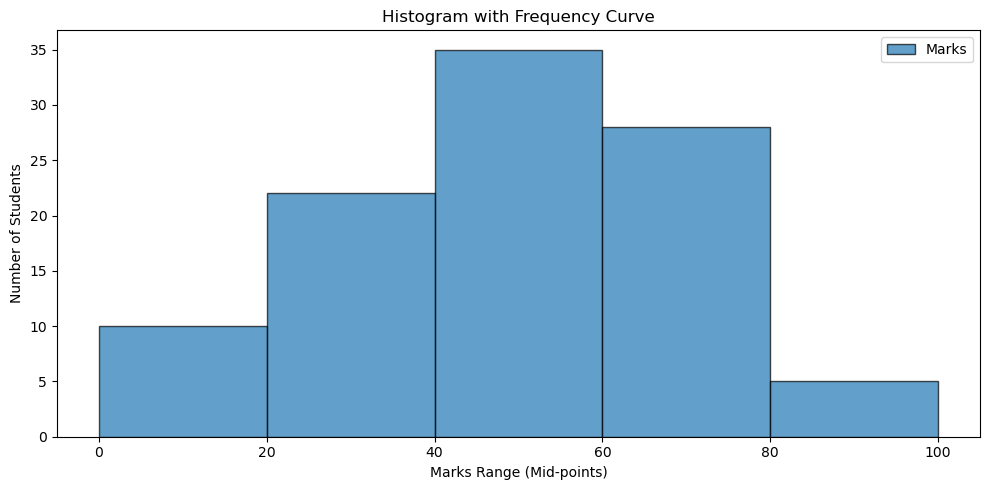

In [10]:
students_data = pd.DataFrame({
    'Marks': ['0-20','20-40','40-60','60-80','80-100'],
    'no_of_students':[10,22,35,28,5]
})
students_data['mid_points'] = students_data['Marks'].apply(lambda m : (int(m.split('-')[0]) + int(m.split('-')[1]))  / 2)
lower_bounds = students_data['Marks'].apply(lambda m: int(m.split('-')[0]) ).min()
upper_bounds = students_data['Marks'].apply(lambda m: int(m.split('-')[1]) ).max()

bin_edges = list(range(lower_bounds, upper_bounds + 1, 20))
students_data['bins'] = pd.cut(x=students_data['no_of_students'], bins=bin_edges)
print(bin_edges)
display(students_data.head())

plt.figure(figsize=(10,5))
#  use mid_points as the x-values for the histogram and the frequency  y-values
plt.hist(students_data['mid_points'], bins=bin_edges, weights=students_data['no_of_students'], 
         edgecolor='black', alpha=0.7, label='Marks')

# Add labels and title
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Number of Students')
plt.title('Histogram with Frequency Curve')
# Display the legend
plt.legend()
plt.tight_layout()
# Show the plot
plt.show()



### Frequency Polygon

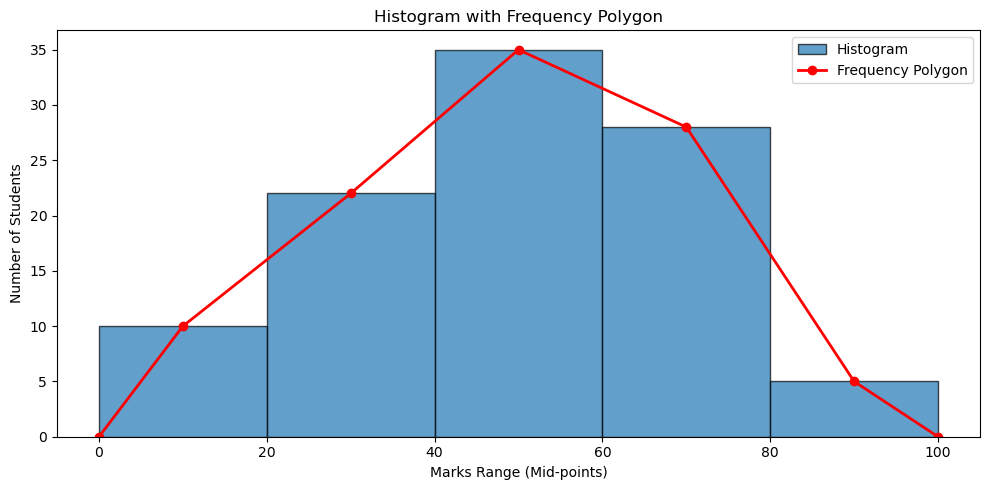

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
students_data = pd.DataFrame({
    'Marks': ['0-20', '20-40', '40-60', '60-80', '80-100'],
    'no_of_students': [10, 22, 35, 28, 5]
})

# Calculate the midpoint of each Marks range
students_data['mid_points'] = students_data['Marks'].apply(
    lambda m: (int(m.split('-')[0]) + int(m.split('-')[1])) / 2
)

# Get the lower and upper bounds for binning
lower_bounds = students_data['Marks'].apply(lambda m: int(m.split('-')[0])).min()
upper_bounds = students_data['Marks'].apply(lambda m: int(m.split('-')[1])).max()

# Create the bin edges
bin_edges = list(range(lower_bounds, upper_bounds + 1, 20))

# Plotting
plt.figure(figsize=(10, 5))

# Plot the histogram
plt.hist(students_data['mid_points'], bins=bin_edges, weights=students_data['no_of_students'], 
         edgecolor='black', alpha=0.7, label='Histogram')

# Add points for frequency polygon, ensuring it starts and ends at 0
x_values = [lower_bounds] + students_data['mid_points'].tolist() + [upper_bounds]
y_values = [0] + students_data['no_of_students'].tolist() + [0]

# Plot the frequency polygon
plt.plot(x_values, y_values, marker='o', color='red', linestyle='-', label='Frequency Polygon', linewidth=2)

# Add labels and title
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Number of Students')
plt.title('Histogram with Frequency Polygon')

# Display the legend
plt.legend()

# Make sure everything fits well in the layout
plt.tight_layout()

# Show the plot
plt.show()

### Cumulative Frequency Curve

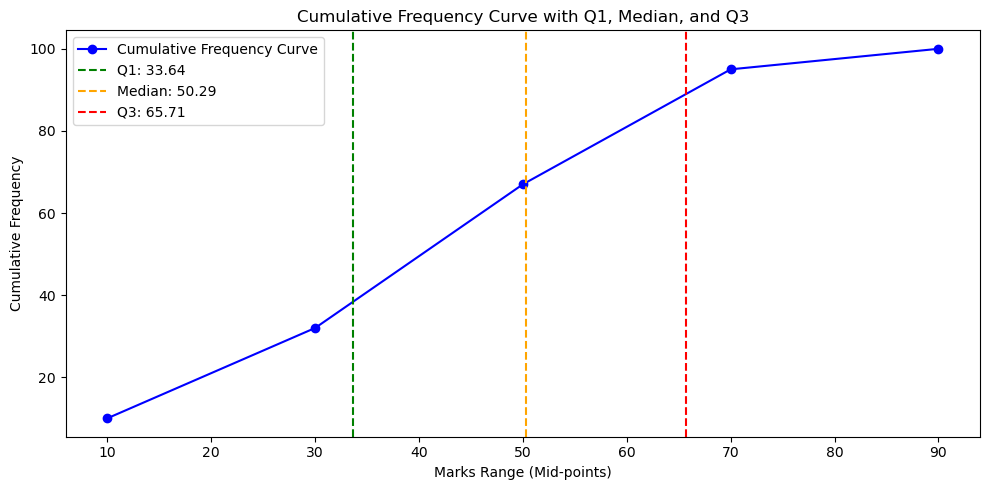

Q1 (25th percentile): 33.63636363636363
Median (50th percentile): 50.285714285714285
Q3 (75th percentile): 65.71428571428571


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the grouped data
students_data = pd.DataFrame({
    'Marks': ['0-20', '20-40', '40-60', '60-80', '80-100'],
    'no_of_students': [10, 22, 35, 28, 5]
})

# Calculate midpoints 
students_data['mid_points'] = students_data['Marks'].apply(
    lambda m: (int(m.split('-')[0]) + int(m.split('-')[1])) / 2
)

# Cumulative frequency
students_data['cumulative_freq'] = students_data['no_of_students'].cumsum()

# Calculate the total number of students
total_students = students_data['no_of_students'].sum()



# Function to calculate quartile using interpolation
def calculate_quartile(position, students_data):
    for index, row in students_data.iterrows():
        if row['cumulative_freq'] >= position:
            # Find the class interval where the quartile lies
            L = int(row['Marks'].split('-')[0])  # Lower boundary of the class
            cf = students_data.loc[index - 1, 'cumulative_freq'] if index > 0 else 0  # Cumulative frequency of the previous class
            f = row['no_of_students']  # Frequency of the current class
            h = 20  # Class width 
            return L + ( ( (position - cf) / f) * h )   # L + ((N/2,N/4,3N/4 - cf)/f) *h
    return None

# Calculate positions of Q1, Median (Q2), and Q3
Q1_position = 0.25 * total_students
Q2_position = 0.50 * total_students
Q3_position = 0.75 * total_students
# Calculate Q1, Median, and Q3 using interpolation
Q1 = calculate_quartile(Q1_position, students_data)
Median = calculate_quartile(Q2_position, students_data)
Q3 = calculate_quartile(Q3_position, students_data)



# Plotting the cumulative frequency curve (ogive)
plt.figure(figsize=(10, 5))

# Cumulative frequency curve x = midpoints, y = cf
plt.plot(students_data['mid_points'], students_data['cumulative_freq'], marker='o', color='blue', label='Cumulative Frequency Curve')

# Mark the points for Q1, Median, and Q3
plt.axvline(x=Q1, color='green', linestyle='--', label=f'Q1: {Q1:.2f}')
plt.axvline(x=Median, color='orange', linestyle='--', label=f'Median: {Median:.2f}')
plt.axvline(x=Q3, color='red', linestyle='--', label=f'Q3: {Q3:.2f}')

# Add labels and title
plt.xlabel('Marks Range (Mid-points)')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Curve with Q1, Median, and Q3')
plt.legend()
plt.tight_layout()
plt.show()


# Print Q1, Median, Q3
print(f"Q1 (25th percentile): {Q1}")
print(f"Median (50th percentile): {Median}")
print(f"Q3 (75th percentile): {Q3}")

## Compositions
- Pie Chart
- Stacked Bar Graph

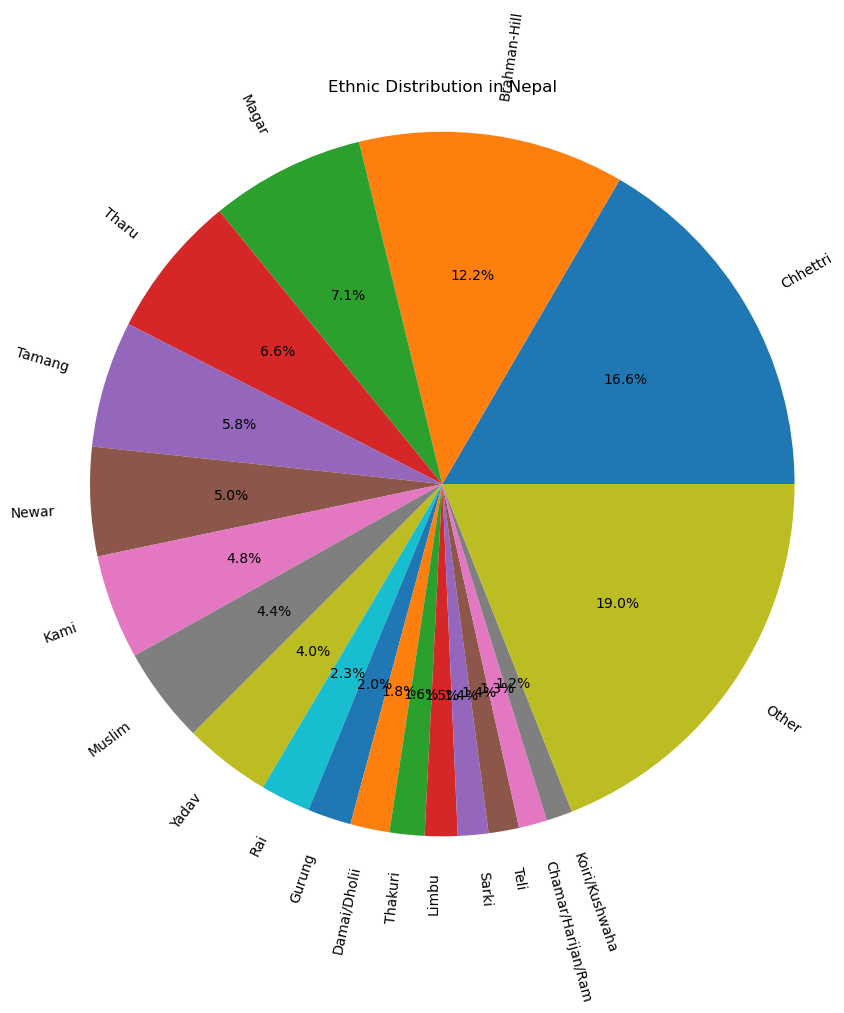

In [13]:
import matplotlib.pyplot as plt
import json

with open('data/nepal-population-ethinic-group.json', 'r') as file:
    ethinic_dist = json.load(file)

# Data preparation
labels = ethinic_dist.keys()
sizes = ethinic_dist.values()

# Create pie chart  
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, rotatelabels=45)
plt.title('Ethnic Distribution in Nepal')
plt.axis('equal') 
  
# Display the pie chart
plt.show()


### Stacked Bar Graph (Homework)